In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [7]:
#want to get characteristic of group
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


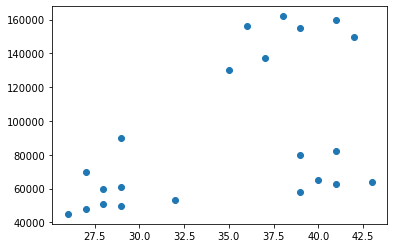

In [10]:
plt.scatter(df['Age'],df['Income($)'])

In [11]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [14]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [15]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [17]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


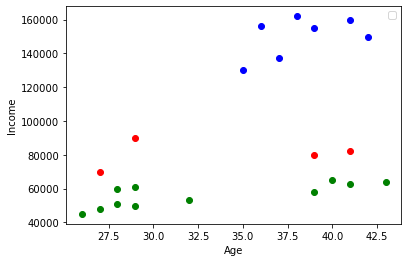

In [21]:
#seperating the clusters
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [24]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [25]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [26]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [27]:
df['cluter']=y_predicted
df.drop('cluster',axis='columns')

,Name,Age,Income($),cluter
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [29]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

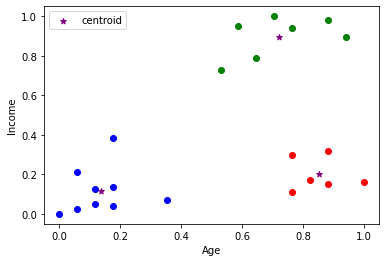

In [30]:
#seperating the clusters
df0=df[df.cluter==0]
df1=df[df.cluter==1]
df2=df[df.cluter==2]
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [31]:
#Elbow technique
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [32]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.36877340764405897,
 0.2664030124668415,
 0.2105547899547249,
 0.16869711728567785,
 0.13265419827245162,
 0.10907864282306068]

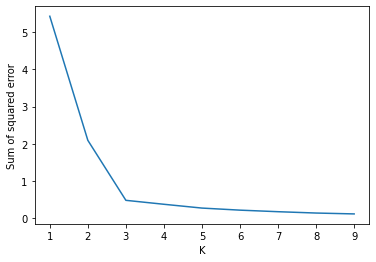

In [33]:
#elbow is 3
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)